# Download house pricing data from Kaggle
https://www.kaggle.com/general/74235

1. Create a Kaggle account or link it with an existing one (e.g., Gmail).

2. Go to your account, Scroll to API section and Click Expire API Token to remove previous tokens

3. Click on Create New API Token - It will download kaggle.json file on your machine.

In [1]:
# import files class to upload files to colab
from google.colab import files

In [2]:
# upload kaggle.json
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"pkasnesis","key":"fb11c2b7e6744f1aad0fb1224994e01c"}'}

In [3]:
# Make directory named kaggle and copy kaggle.json file there.
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json

In [4]:
# Download house price dataset and unzip to the corresponding folder
! kaggle datasets download 'shivachandel/kc-house-data'
! mkdir house
! unzip kc-house-data.zip  -d house

Dataset URL: https://www.kaggle.com/datasets/shivachandel/kc-house-data
License(s): other
  0% 0.00/770k [00:00<?, ?B/s]
100% 770k/770k [00:00<00:00, 76.7MB/s]
Archive:  kc-house-data.zip
  inflating: house/kc_house_data.csv  


# Linear Regression using the sklearn library

In [6]:
!pip install scikit-learn

In [7]:
import pandas as pd #it is a library for reading csv alike files (very similar to excel)
import numpy as np #it is a library for matrix multiplications (very similar to matlab)
import matplotlib.pyplot as plt #it is a library for ploting (very similar to matlab plotting tools)
%matplotlib inline

In [8]:
#read data stored as kc_house_data.csv
df = pd.read_csv('house/kc_house_data.csv')
df.tail()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
21608,263000018,20140521T000000,360000.0,3,2.50,1530,1131,3.0,0,0,...,8,1530.0,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,20150223T000000,400000.0,4,2.50,2310,5813,2.0,0,0,...,8,2310.0,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,20140623T000000,402101.0,2,0.75,1020,1350,2.0,0,0,...,7,1020.0,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,20150116T000000,400000.0,3,2.50,1600,2388,2.0,0,0,...,8,1600.0,0,2004,0,98027,47.5345,-122.069,1410,1287
21612,1523300157,20141015T000000,325000.0,2,0.75,1020,1076,2.0,0,0,...,7,1020.0,0,2008,0,98144,47.5941,-122.299,1020,1357


In [9]:
#set X and Y
size = df['sqft_living']
price = df['price']

In [33]:
#convert to numpy arrays
X = np.asarray(size).reshape(-1, 1) #X must be a 2D array
Y = np.asarray(price)

In [34]:
#split dataset using from sklearn train_test_split
# 80% training, 20% test
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X,Y,test_size=0.2, random_state=0)
print(x_train.shape, x_test.shape)

(17290, 1) (4323, 1)


In [35]:
#train model using linera regression
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(x_train, y_train)

LinearRegression()

In [38]:
#make predictions and estimate test error
from sklearn.metrics import root_mean_squared_error
preds = lr.predict(x_test)
root_mean_squared_error(y_test, preds)

248879.06124185046

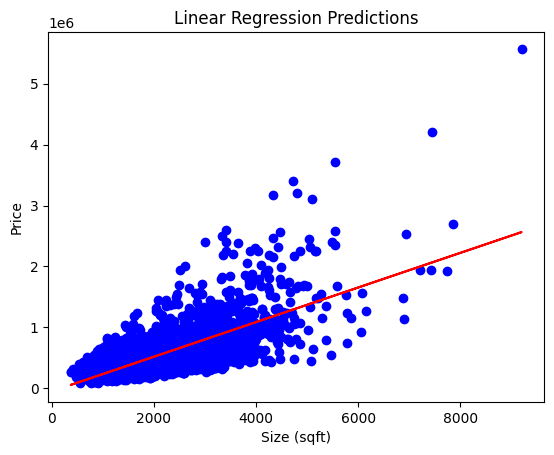

In [39]:
#Visualizing predictions
plt.scatter(x_test, y_test, color= 'blue')
plt.plot(x_test, preds, color = 'red')
plt.title ("Linear Regression Predictions")
plt.xlabel("Size (sqft)")
plt.ylabel("Price")
plt.show()

# TO DO!
1. Train algorithm using sqft, number of bedroom and year build as features.
(hint: normalize features https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html)
2. Estimate how much the algorithm improved.

# Linear Regression (Custom)

In [ ]:
#set X and Y
size = df['sqft_living']
price = df['price']

#convert to numpy arrays
X = np.asarray(size)
Y = np.asarray(price)

#split dataset
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X,Y,test_size=0.2, random_state=0)
print(x_train.shape, x_test.shape)

(17290,) (4323,)


In [ ]:
# set m_train
m_train = len(x_train)
print('the length of the train datasets is equal to {}'.format(m_train))

# TO DO
#set m_test
m_test = None
print('the length of the test datasets is equal to {}'.format(m_test))

the length of the train datasets is equal to 17290
the length of the train datasets is equal to None


In [ ]:
# TO DO
# Add one more column to x_train, x_test as x0
# (hint) you can use np.ones and/or np.stack, np.concatenate

### Gradient Descent

1. Estimate the cost function

$$ J(w, b) = \frac{1}{2m} \sum_{i=1}^m \left( \hat{y}^{(i)} - y^{(i)}\right)^2$$

where the prediction given by the linear model
$$ \hat{y} = bx_0 + wx_1$$, and $$x_0 = 1$$.

2. Simultaneously update all parameters

$$ w := w - \lambda \frac{1}{m} \sum_{i=1}^m \left( \hat{y}^{(i)} - y^{(i)}\right)x_1^{(i)} $$

$$ b := b - \lambda \frac{1}{m} \sum_{i=1}^m \left( \hat{y}^{(i)} - y^{(i)}\right)$$

In [ ]:
def costFunction(X, y, theta, m):
    """
    Computes cost for linear regression.
    X : feature vector, shape (m x n+1)
    y : labels (i.e., price), shape (m, )
    theta : parameters for the linear regression, shape (n+1, )
    m: data legth

    returns
    -------
    J : value of cost function.
    """

    # TO DO !!!
    J = None

    return J

In [ ]:
def gradientDescent(X, y, theta, m, l, epochs):
    """
    Updates parameters.
    X : feature vector, shape (m x n+1)
    y : labels (i.e., price), shape (m, )
    theta : parameters for the linear regression, shape (n+1, )
    m : data legth
    l : learning rate
    epochs : number of iterations

    returns
    -------
    thetas : updated parameters
    cost_values : list of Js to check the training progress
    """
    theta = np.copy(theta)
    cost_values = []

    for i in range(epochs):
        # TO DO
        # 1. update theta using the
        # 2. save J to cost values
        theta = None
        # =====
    return theta, cost_values

In [ ]:
# initialize variables
np.random.seed(0)
theta = np.random.rand(2)*0.1 # TO DO set random small values
epochs = 1000
l = 0.01

In [ ]:
mean = np.mean(x_train, axis = 0)
sigma = np.std(x_train, axis = 0)

In [ ]:
# normalize
def normalization(x, mean, sigma):

    x_norm = np.ones_like(x)

    for i in range(1,x_train.shape[1]):
      x_norm[:,i] = (x[:,i] - mean[i]) / sigma[i]

    # =====
    return x_norm

In [ ]:
x_norm = normalization(x_train, mean, sigma)
thetas, cost_values = gradientDescent(x_norm, y_train, theta, m_train, l, epochs)

assert np.round(thetas[0],2) == 542776.4
assert np.round(thetas[1],2) == 262153.53

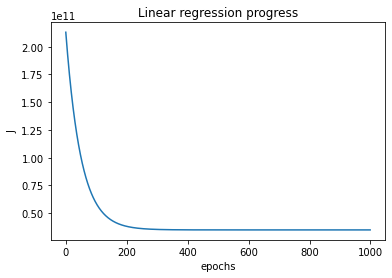

In [ ]:
plt.plot(cost_values)
plt.title ("Linear regression progress")
plt.xlabel("epochs")
plt.ylabel("J")
plt.show()

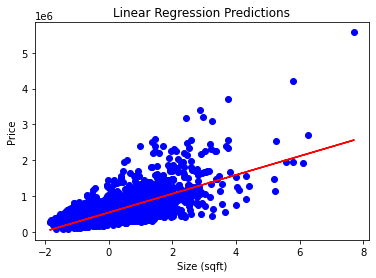

In [ ]:
#Visualizing predictions
x_test_norm = normalization(x_test, mean, sigma)
preds = np.dot(x_test_norm,thetas)
plt.scatter(x_test_norm[:,1], y_test, color= 'blue')
plt.plot(x_test_norm[:,1], preds, color = 'red')
plt.title ("Linear Regression Predictions")
plt.xlabel("Size (sqft)")
plt.ylabel("Price")
plt.show()

# Multivariate Linear Regression (Custom)

1. Train custom LR algorithm using sqft, number of bedroom and year build as features.

2. Follow similar procedure with the sqft feature including bias (x0)

3. Change parameter size accordingly (n, ). Hint do not reshape x_train during concatenation.

4. How much does your alogrithm think that the 20th house in the test dataset cost? (Hint thetas should be around [542776.40442377, 312955.5479766 , -52340.61575242, -70637.33360148])

### Gradient Descent

1. Estimate the cost function

$$ J(\theta) = \frac{1}{2m} \sum_{i=1}^m \left( \hat{y}^{(i)} - y^{(i)}\right)^2$$

where the prediction given by the linear model
$$ \hat{y} = bx_0 + w_1x_1 + w_2x_2 + ... + w_nx_n$$, and $$x_0 = 1$$.

2. Simultaneously update all parameters

$$ w_j := w_j - \lambda \frac{1}{m} \sum_{i=1}^m \left( \hat{y}^{(i)} - y^{(i)}\right)x_j^{(i)} $$

$$ b := b - \lambda \frac{1}{m} \sum_{i=1}^m \left( \hat{y}^{(i)} - y^{(i)}\right)$$

In [ ]:
df[['sqft_living', 'bedrooms','yr_built', 'price']]

,sqft_living,bedrooms,yr_built,price
0,1180,3,1955,221900.0
1,2570,3,1951,538000.0
2,770,2,1933,180000.0
3,1960,4,1965,604000.0
4,1680,3,1987,510000.0
...,...,...,...,...
21608,1530,3,2009,360000.0
21609,2310,4,2014,400000.0
21610,1020,2,2009,402101.0
21611,1600,3,2004,400000.0


In [ ]:
#set X and Y
size = df[['sqft_living', 'bedrooms','yr_built']]
price = df['price']

#convert to numpy arrays
X = np.asarray(size)
Y = np.asarray(price)

#split dataset
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X,Y,test_size=0.2, random_state=0)
print(x_train.shape, x_test.shape)

(17290, 3) (4323, 3)


In [ ]:
# initialize variables
np.random.seed(0)
theta = None # TO DO set four random small values
epochs = 1000
l = 0.01

In [ ]:
x_train = np.concatenate([np.ones(m_train).reshape(-1,1), x_train], axis=1)
x_test = np.concatenate([np.ones(m_test).reshape(-1,1), x_test], axis=1)

In [ ]:
mean = np.mean(x_train, axis = 0)
sigma = np.std(x_train, axis = 0)

In [ ]:
x_norm = normalization(x_train, mean, sigma)
thetas, cost_values = gradientDescent(x_norm, y_train, theta, m_train, l, epochs)

In [ ]:
x_norm

array([[ 1.        , -0.55395019, -0.39003389, -1.05018286],
       [ 1.        , -0.32648492, -0.39003389,  0.30645855],
       [ 1.        , -1.07387079, -0.39003389,  0.54387079],
       ...,
       [ 1.        ,  0.30175248, -0.39003389,  0.23862648],
       [ 1.        ,  0.31258416,  0.67029408,  0.23862648],
       [ 1.        ,  0.32341584,  0.67029408, -0.33794612]])

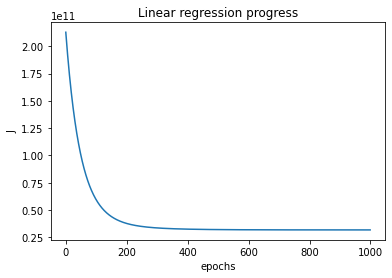

In [ ]:
plt.plot(cost_values)
plt.title ("Linear regression progress")
plt.xlabel("epochs")
plt.ylabel("J")
plt.show()

In [ ]:
# TO DO.
# estimate the test error
# Hint: Normalize first the test set then use the costFunction
x_norm_test = None
test_error = None
#######
assert test_error == 27971339477.682686

In [ ]:
#TO DO
# Estimate the price for the 21st house in the test set
pred = None
print('The price prediction for the 21st house in the test set is {}'.format(pred)) #should be arround 416454.59 dollars

416454.5906537639